### Import Packages and Load

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pkl_in_temp = open('tempems_pkl_021120', 'rb')

df = pickle.load(pkl_in_temp)

### Using Covariates Listed in PLOS Model (p.11 in supplementary appendix)
https://journals.plos.org/plosmedicine/article/file?id=info%3Adoi/10.1371/journal.pmed.1002956.s002&type=supplementary

In [3]:
var = ['pdb2018trv4_us_csv_Tot_Populati', 'pdb2018trv4_us_csv_pct_Males_CE', 'pdb2018trv4_us_csv_pct_Pop_18_2'
       'pdb2018trv4_us_csv_pct_Pop_25_4', 'pdb2018trv4_us_csv_pct_Pop_45_6', 'pdb2018trv4_us_csv_pct_Pop_65pl',
       'pdb2018trv4_us_csv_NH_White_alo', 'pdb2018trv4_us_csv_NH_Blk_alone', 'pdb2018trv4_us_csv_NH_Asian_alo',
      'pdb2018trv4_us_csv_pct_Hispanic', 'pdb2018trv4_us_csv_Med_HHD_Inc_', 'pdb2018trv4_us_csv_avg_Agg_HH_I',
      'pdb2018trv4_us_csv_Prs_Blw_Pov_', 'pdb2018trv4_us_csv_pct_College_', 'pdb2018trv4_us_csv_Med_House_Va']

In [4]:
var.append('ems_calls')

In [5]:
var

['pdb2018trv4_us_csv_Tot_Populati',
 'pdb2018trv4_us_csv_pct_Males_CE',
 'pdb2018trv4_us_csv_pct_Pop_18_2pdb2018trv4_us_csv_pct_Pop_25_4',
 'pdb2018trv4_us_csv_pct_Pop_45_6',
 'pdb2018trv4_us_csv_pct_Pop_65pl',
 'pdb2018trv4_us_csv_NH_White_alo',
 'pdb2018trv4_us_csv_NH_Blk_alone',
 'pdb2018trv4_us_csv_NH_Asian_alo',
 'pdb2018trv4_us_csv_pct_Hispanic',
 'pdb2018trv4_us_csv_Med_HHD_Inc_',
 'pdb2018trv4_us_csv_avg_Agg_HH_I',
 'pdb2018trv4_us_csv_Prs_Blw_Pov_',
 'pdb2018trv4_us_csv_pct_College_',
 'pdb2018trv4_us_csv_Med_House_Va',
 'ems_calls']

In [6]:
plos = df.filter(var)

In [7]:
plos['log_pop'] = np.log(plos['pdb2018trv4_us_csv_Tot_Populati'])

In [8]:
plos['prop_pov'] = plos['pdb2018trv4_us_csv_Prs_Blw_Pov_']/plos['pdb2018trv4_us_csv_Tot_Populati']

In [9]:
plos.head()

,pdb2018trv4_us_csv_Tot_Populati,pdb2018trv4_us_csv_pct_Males_CE,pdb2018trv4_us_csv_pct_Pop_45_6,pdb2018trv4_us_csv_pct_Pop_65pl,pdb2018trv4_us_csv_NH_White_alo,pdb2018trv4_us_csv_NH_Blk_alone,pdb2018trv4_us_csv_NH_Asian_alo,pdb2018trv4_us_csv_pct_Hispanic,pdb2018trv4_us_csv_Med_HHD_Inc_,pdb2018trv4_us_csv_avg_Agg_HH_I,pdb2018trv4_us_csv_Prs_Blw_Pov_,pdb2018trv4_us_csv_pct_College_,pdb2018trv4_us_csv_Med_House_Va,ems_calls,log_pop,prop_pov
0,4650.0,54.41,15.89,5.78,2577.0,148.0,159.0,32.97,43300.0,48725.0,1486.0,27.02,102500.0,3,8.444622,0.31957
1,4650.0,54.41,15.89,5.78,2577.0,148.0,159.0,32.97,43300.0,48725.0,1486.0,27.02,102500.0,5,8.444622,0.31957
2,4650.0,54.41,15.89,5.78,2577.0,148.0,159.0,32.97,43300.0,48725.0,1486.0,27.02,102500.0,6,8.444622,0.31957
3,4650.0,54.41,15.89,5.78,2577.0,148.0,159.0,32.97,43300.0,48725.0,1486.0,27.02,102500.0,2,8.444622,0.31957
4,4650.0,54.41,15.89,5.78,2577.0,148.0,159.0,32.97,43300.0,48725.0,1486.0,27.02,102500.0,5,8.444622,0.31957


In [10]:
plos.drop(['pdb2018trv4_us_csv_Tot_Populati', 'pdb2018trv4_us_csv_Prs_Blw_Pov_'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c286a2d30>,
      dtype=object)

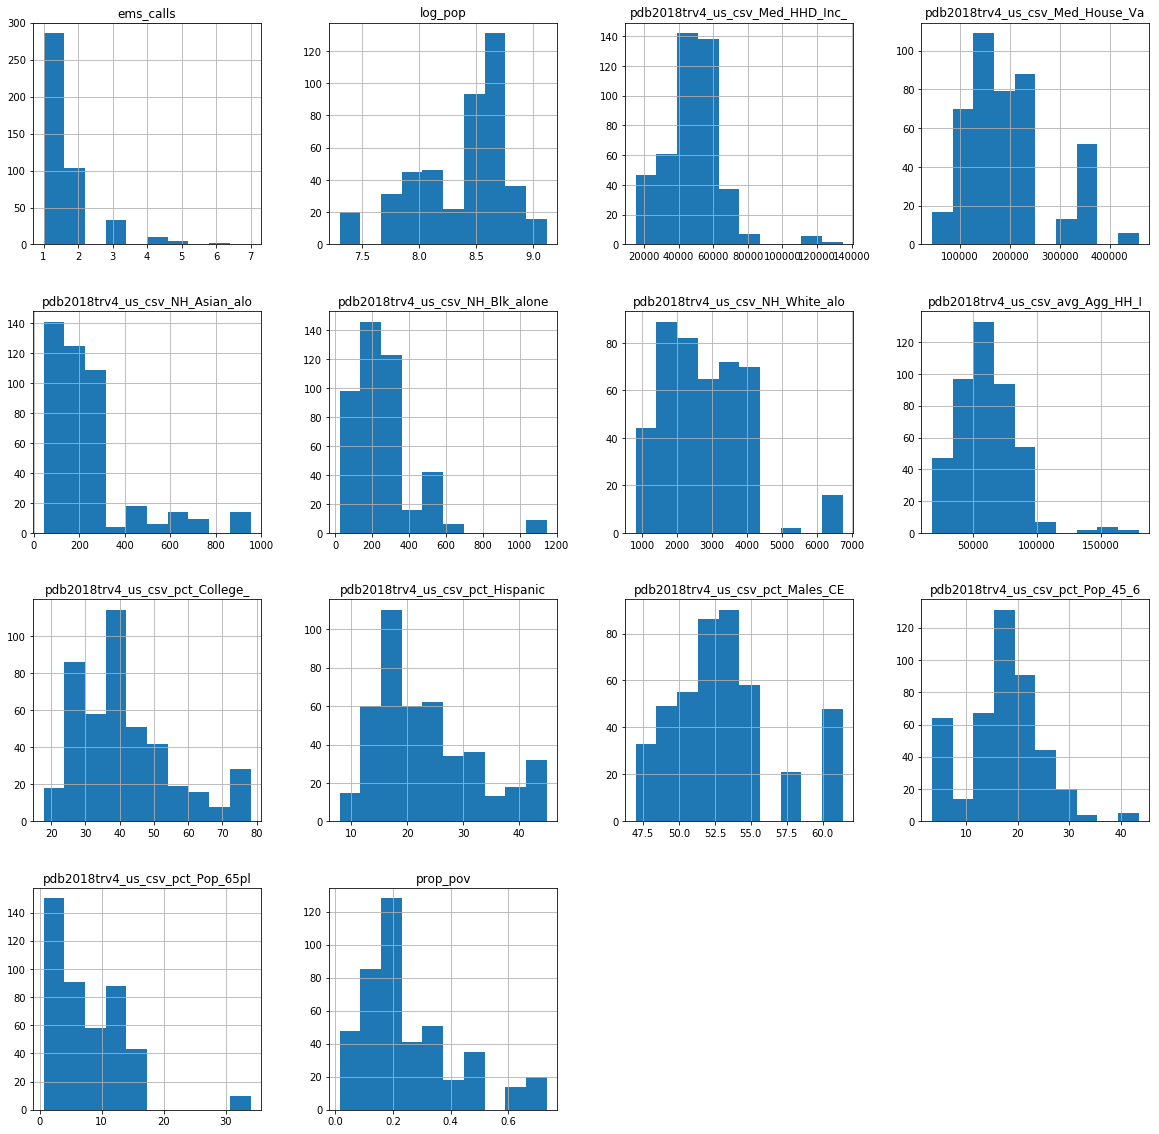

In [11]:
plos.hist(figsize=(20,20))

In [12]:
plt.subplots?

(array([286.,   0.,   0., 103.,   0.,  33.,   0.,  10.,   5.,   3.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

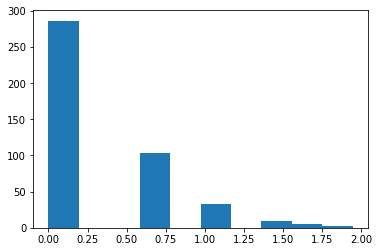

In [13]:
plt.hist(np.log(plos.ems_calls))

(array([286., 103.,   0.,  33.,   0.,  10.,   5.,   0.,   2.,   1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

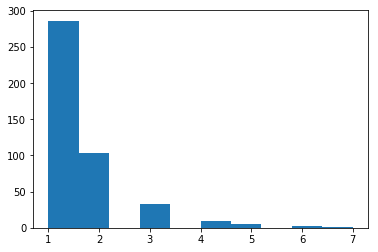

In [14]:
plt.hist(plos.ems_calls)

In [15]:
plos.ems_calls.value_counts()

1    286
2    103
3     33
4     10
5      5
6      2
7      1
Name: ems_calls, dtype: int64

In [16]:
len(df.tract.unique())

36

In [17]:
len(plos.prop_pov)

440

In [18]:
len(plos.prop_pov.unique())

36

In [19]:
plos.dropna(inplace=True)

In [20]:
X, y = plos, plos.ems_calls
X.drop(columns='ems_calls', inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
res = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              ems_calls   No. Observations:                  347
Model:                            GLM   Df Residuals:                      334
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.88
Date:                Thu, 20 Feb 2020   Deviance:                       127.94
Time:                        19:27:46   Pearson chi2:                     148.
No. Iterations:                     4   Covariance Type:             nonrobust
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
pdb2018trv4_us_csv_pct_Males_CE     0.0593      0.035      1.710      0.087      -0.009  

### Trim Variables

In [ ]:
df.head()

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])

In [ ]:
var = ['pdb2018trv4_us_csv_pct_College_', 'pdb2018trv4_us_csv_pct_PUB_ASST','pdb2018trv4_us_csv_pct_Civ_unem',
'pdb2018trv4_us_csv_pct_Pop_18_2', 'pdb2018trv4_us_csv_pct_Pop_25_6','pdb2018trv4_us_csv_pct_Pop_45_6',
'pdb2018trv4_us_csv_pct_Pop_65pl','pdb2018trv4_us_csv_pct_Pop_Disa','ems_calls','pdb2018trv4_us_csv_Med_HHD_Inc_',
     'pdb2018trv4_us_csv_pct_Owner__1', 'pdb2018trv4_us_csv_Med_House_Va']

In [ ]:
exp1 = df.filter(var)

In [ ]:
# Compute the correlation matrix
corr = exp1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})